In [66]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib3

urllib3.disable_warnings()

In [67]:
# # Single page set up
# url = f"https://scrapeme.live/shop/"
# response = requests.get(url, verify=False)
# df = bs(response.content, 'html.parser')

# itemList = df.find_all("li", {"class": "product"})
# len(itemList)

In [68]:
# Multi page set up
titles = []
for page in range(1, 3):
    url = f"https://scrapeme.live/shop/page/{page}"
    response = requests.get(url, verify=False)
    df = bs(response.content, 'html.parser')

    title = df.find_all("h2", {"class": "woocommerce-loop-product__title"})

    for t in title:
        titles.append(t.get_text())
len(titles)

32

In [69]:
dict = {
    "name": [],
    "price": [],
    "desc": [],
    "stock": [],
    "weight": [],
    "SKU": [],
    "tags": []
}
for t in titles:
    url = f"https://scrapeme.live/shop/{t}"
    resp = requests.get(url, verify=False)
    dr = bs(resp.content, 'html.parser')

    dict["name"].append(t)

    value = dr.find("p", {"class": "price"})
    value = value.text.strip()
    value = value.split("£")[1]
    dict["price"].append(float(value))

    descTag = dr.find("div", {"class": "woocommerce-product-details__short-description"})
    dsc = descTag.get_text(strip=True)
    dict["desc"].append(dsc)

    
    unitTag = dr.find("p", {"class":"stock in-stock"})
    units = unitTag.get_text(strip=True)
    units = units.split(" ")[0]
    dict["stock"].append(int(units))

    weightTag = dr.find("td", {"class" : "product_weight"})
    weight = weightTag.get_text(strip=True)
    weight = weight.split(" ")[0]
    dict["weight"].append(float(weight))


    idTag = dr.find("span",{"class": "sku"})
    id = idTag.get_text(strip=True)
    dict["SKU"].append(id)

    tagList = dr.find("span", {"class": "tagged_as"})
    tag = tagList.get_text()
    tag = tag.replace("\n", "").replace("Tags:", "").strip()
    dict["tags"].append(tag)

In [70]:
poke = pd.DataFrame(dict)
poke.to_csv("products.csv", index=False)
poke

,name,price,desc,stock,weight,SKU,tags
0,Bulbasaur,63.0,Bulbasaur can be seen napping in bright sunlig...,45,15.2,4391,"bulbasaur, Overgrow, Seed"
1,Ivysaur,87.0,There is a bud on this Pokémon’s back. To supp...,142,28.7,7227,"ivysaur, Overgrow, Seed"
2,Venusaur,105.0,There is a large flower on Venusaur’s back. Th...,30,220.5,7036,"Overgrow, Seed, venusaur"
3,Charmander,48.0,The flame that burns at the tip of its tail is...,206,18.7,9086,"Blaze, charmander, Lizard"
4,Charmeleon,165.0,Charmeleon mercilessly destroys its foes using...,284,41.9,6565,"Blaze, charmeleon, Flame"
5,Charizard,156.0,Charizard flies around the sky in search of po...,31,199.5,8840,"Blaze, Charizard, Flame"
6,Squirtle,130.0,Squirtle’s shell is not merely used for protec...,178,19.8,6094,"squirtle, Tiny Turtle, Torrent"
7,Wartortle,123.0,"Its tail is large and covered with a rich, thi...",24,49.6,9659,"Torrent, Turtle, wartortle"
8,Blastoise,76.0,Blastoise has water spouts that protrude from ...,88,188.5,5212,"blastoise, Shellfish, Torrent"
9,Caterpie,73.0,Caterpie has a voracious appetite. It can devo...,40,6.4,7492,"caterpie, Shield Dust, Worm"


In [71]:
# type(poke["name"][0]) str
# type(poke["price"][0]) float
# type(poke["desc"][0]) str
# type(poke["stock"][0]) int64
# type(poke["weight"][0]) float64
# type(poke["SKU"][0]) int
# type(poke["tags"][0]) list

In [72]:
def price_format(value):
    f = float(value)
    formatted = f"{value:06.2f}" 
    return float(formatted)

poke["price"] = poke["price"].map(price_format)

In [73]:
def sku_format(value):
    formatted = value.zfill(4)
    formatted = int(formatted)
    return formatted

poke["SKU"] = poke["SKU"].map(sku_format)

In [74]:
def tag_format(value):
    tagArr = value.split(",")
    for t in range(len(tagArr)):
        tagArr[t] = tagArr[t].strip()
    
    return tagArr

poke["tags"] = poke["tags"].map(tag_format)

In [75]:
def discounted_price(price):
    discount = float(price) * 0.8
    return discount #float(f"{discount:06.2f}")

poke["discounted_price"] = poke["price"].map(discounted_price)        

In [76]:
def average(value):
    metrics = {
        "mean": [],
        "median": [],
        "min": [],
        "max": [],
        "range": []
    }

    mean = round(float(value.mean()),2)
    median = round(float(value.median()),2)
    range = round(float(value.max() - value.min()),2)

    metrics["mean"].append(round(mean,2))
    metrics["min"].append(float(value.max()))
    metrics["max"].append(float(value.min()))
    metrics["median"].append((median))
    metrics["range"].append(range)

    return metrics
    
priceMetrics = average(poke["price"])
weightMetrics = average(poke["weight"])
stockMetrics = average(poke["stock"])

priceMetrics, weightMetrics, stockMetrics

({'mean': [109.88],
  'median': [114.5],
  'min': [185.0],
  'max': [25.0],
  'range': [160.0]},
 {'mean': [61.08],
  'median': [42.45],
  'min': [220.5],
  'max': [4.0],
  'range': [216.5]},
 {'mean': [150.41],
  'median': [147.5],
  'min': [285.0],
  'max': [16.0],
  'range': [269.0]})

In [77]:
def tag_freq(tagSeries):
    tagDict = {   }
    
    for tags in tagSeries:
        for tagitem in tags:
            for t in (tags, tagSeries):
                count = [x for x in t if x == tagitem]
                if(count):
                    if tagitem in tagDict:
                        tagDict[tagitem] += 1
                    else:
                        tagDict[tagitem.capitalize()] = 1


    reordered = {}
    for key in sorted(tagDict.keys()):
        reordered[key] = tagDict[key]

    
    return reordered
                    

tagRec = tag_freq(poke["tags"])

for r in tagRec:
    if tagRec[r] > 1:
        print(f"{r}: {tagRec[r]}")


Bird: 2
Blaze: 3
Cocoon: 2
Drill: 2
Flame: 2
Mouse: 6
Overgrow: 3
Seed: 3
Static: 2
Torrent: 3


In [78]:
def stock_analysis(stockSeries):
    dupe = [    ]

    for stock in stockSeries:
        if stock < 50:
            dupe.append("Low")
        elif stock >= 50 and stock <= 150:
            dupe.append("Medium")
        else:
            dupe.append("High")
    return dupe

poke["stock level"] = stock_analysis(poke["stock"])

In [79]:
poke["rarity"] = pd.cut(
    poke["price"],
    bins=[0, 20, 50, 150, np.inf],
    labels=["Common", "Uncommon", "Rare", "Legendary"]
)


In [80]:
poke

,name,price,desc,stock,weight,SKU,tags,discounted_price,stock level,rarity
0,Bulbasaur,63.0,Bulbasaur can be seen napping in bright sunlig...,45,15.2,4391,"[bulbasaur, Overgrow, Seed]",50.4,Low,Rare
1,Ivysaur,87.0,There is a bud on this Pokémon’s back. To supp...,142,28.7,7227,"[ivysaur, Overgrow, Seed]",69.6,Medium,Rare
2,Venusaur,105.0,There is a large flower on Venusaur’s back. Th...,30,220.5,7036,"[Overgrow, Seed, venusaur]",84.0,Low,Rare
3,Charmander,48.0,The flame that burns at the tip of its tail is...,206,18.7,9086,"[Blaze, charmander, Lizard]",38.4,High,Uncommon
4,Charmeleon,165.0,Charmeleon mercilessly destroys its foes using...,284,41.9,6565,"[Blaze, charmeleon, Flame]",132.0,High,Legendary
5,Charizard,156.0,Charizard flies around the sky in search of po...,31,199.5,8840,"[Blaze, Charizard, Flame]",124.8,Low,Legendary
6,Squirtle,130.0,Squirtle’s shell is not merely used for protec...,178,19.8,6094,"[squirtle, Tiny Turtle, Torrent]",104.0,High,Rare
7,Wartortle,123.0,"Its tail is large and covered with a rich, thi...",24,49.6,9659,"[Torrent, Turtle, wartortle]",98.4,Low,Rare
8,Blastoise,76.0,Blastoise has water spouts that protrude from ...,88,188.5,5212,"[blastoise, Shellfish, Torrent]",60.8,Medium,Rare
9,Caterpie,73.0,Caterpie has a voracious appetite. It can devo...,40,6.4,7492,"[caterpie, Shield Dust, Worm]",58.4,Low,Rare


In [88]:
## DISCOUNTED PRICE EXTRACTION
## AVERAGE WEIGHT CALC
## WORD REPEAT ANALYSIS FROM DESCRIPTION
## PRICE BASED RARITY 
## STOCK ANALYSIS 
## PRICE VS WEIGHT VS STOCK VS RARITY PLOTS

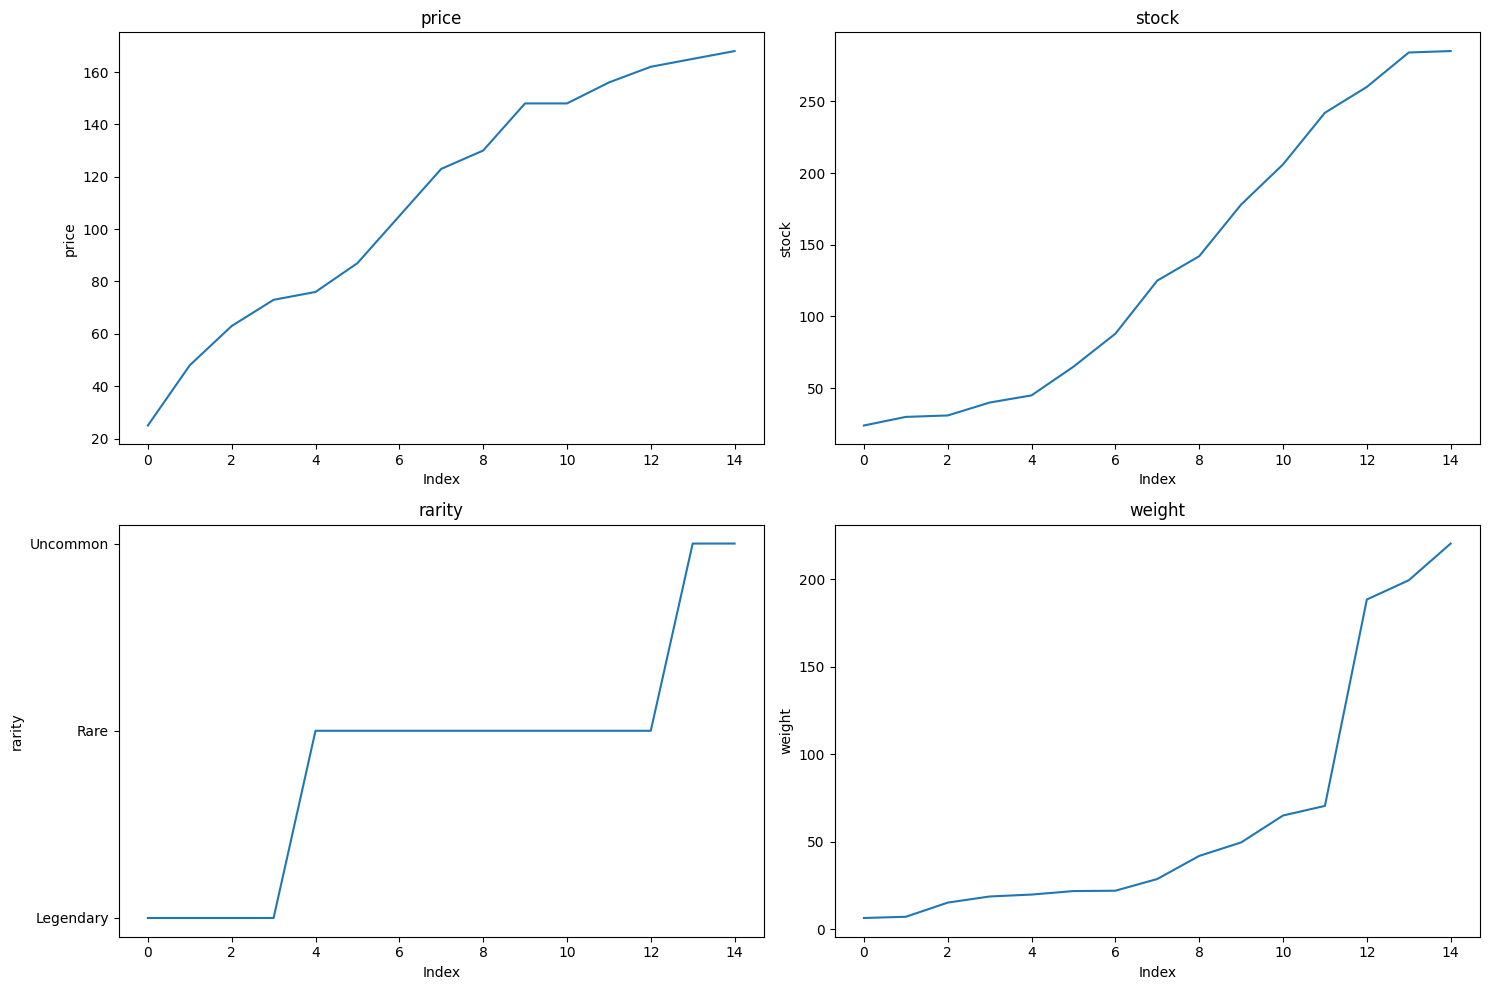

In [101]:
graph_data = {
    "axis": [poke["price"][:15], poke["stock"][:15], poke["rarity"][:15], poke["weight"][:15]],
    "titles": ["price", "stock", "rarity", "weight"],
}

sorted_axis = [sorted(lst) for lst in graph_data["axis"]]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for i in range(4):
    axes[i].plot(sorted_axis[i])
    axes[i].set_title(graph_data["titles"][i])
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(graph_data["titles"][i])

plt.tight_layout()
plt.show()


In [ ]:
rarity_dict = {
    "rare" : [0],
    "cmmn" : [0],
    "ucmn" : [0],
    "lgnd" : [0]
}
for i in poke["rarity"]:
    if i == "Rare":
        rarity_dict["rare"][0] += 1
    elif i == "Legendary":
        rarity_dict["lgnd"][0] += 1
    elif i == "Uncommon":
        rarity_dict["ucmn"][0] += 1
    else:
        rarity_dict["cmmn"][0] += 1




{'rare': [18], 'cmmn': [0], 'ucmn': [5], 'lgnd': [9]}